In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!unzip gdrive/My\ Drive/SIV/data.zip

Archive:  gdrive/My Drive/SIV/data.zip
  inflating: Project Data/column_descriptions.txt  
   creating: Project Data/cybersecurity_test/
  inflating: Project Data/cybersecurity_test/cybersecurity_test.csv  
   creating: Project Data/cybersecurity_training/
  inflating: Project Data/cybersecurity_training/cybersecurity_training.csv  
  inflating: Project Data/InstructionsIITD.txt  
   creating: Project Data/localized_alerts_data/
  inflating: Project Data/localized_alerts_data/localized_alerts_data.csv  
  inflating: Project Data/mergedTrainandLocal.csv  


In [ ]:
train = pd.read_csv("/content/Project Data/cybersecurity_training/cybersecurity_training.csv", delimiter="|", header=[0]) 

In [ ]:
print(train.shape)

(39427, 63)


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39427 entries, 0 to 39426
Data columns (total 63 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   alert_ids                 39427 non-null  object 
 1   client_code               39427 non-null  object 
 2   notified                  39427 non-null  int64  
 3   categoryname              39427 non-null  object 
 4   ip                        39427 non-null  object 
 5   ipcategory_name           39427 non-null  object 
 6   ipcategory_scope          39427 non-null  object 
 7   parent_category           39427 non-null  int64  
 8   grandparent_category      39427 non-null  object 
 9   overallseverity           39427 non-null  int64  
 10  timestamp_dist            39427 non-null  int64  
 11  start_hour                39427 non-null  int64  
 12  start_minute              39427 non-null  int64  
 13  start_second              39427 non-null  int64  
 14  weekda

In [ ]:
train['notified'].astype(bool).sum(axis=0)

2276

In [ ]:
for col in train.columns:
  if train[col].isna().sum()>0:
    print(col, train[col].isna().sum())

n1 32295
n2 32295
n3 32295
n4 32295
n5 32295
n6 32295
n7 32295
n8 32295
n9 32295
n10 32295
score 32295


In [ ]:
def fillmis(data):
  for col in data.columns:
    if data[col].isna().sum()>0:
      data[col].fillna(0, inplace=True)
  return data

In [ ]:
train = fillmis(train)

In [ ]:
train[['ip1', 'ip2', 'ip3', 'ip4']] = train.ip.str.split(".", expand=True)

In [ ]:
del train['ip']

In [ ]:
train.head()

,alert_ids,client_code,notified,categoryname,ipcategory_name,ipcategory_scope,parent_category,grandparent_category,overallseverity,timestamp_dist,start_hour,start_minute,start_second,weekday,correlatedcount,n1,n2,n3,n4,n5,n6,n7,n8,n9,n10,score,srcip_cd,dstip_cd,srcport_cd,dstport_cd,alerttype_cd,direction_cd,eventname_cd,severity_cd,reportingdevice_cd,devicetype_cd,devicevendor_cd,domain_cd,protocol_cd,username_cd,srcipcategory_cd,dstipcategory_cd,isiptrusted,untrustscore,flowscore,trustscore,enforcementscore,dstipcategory_dominate,srcipcategory_dominate,dstportcategory_dominate,srcportcategory_dominate,thrcnt_month,thrcnt_week,thrcnt_day,p6,p9,p5m,p5w,p5d,p8m,p8w,p8d,ip1,ip2,ip3,ip4
0,Nhq,DPM,0,Attack,INTERNET,Internet,7,A,3,65684,8,14,34,Tue,69,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,37,1,67,2,1,1,1,1,1,1,1,0,0,0,3,1,0,2,3,3,-1,INTERNET,PRIV-192,2,4,16711,4160,675,1,0,2,1,1,1,1,1,YT,LB,32,21
1,XZt,FIN,0,Exploit,PRIV-192,Private network,1,A,5,1188030,1,0,2,Thu,5302,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,46,4746,19,4,1,1,5,1,1,1,0,0,0,1,1,1,5,5,3,0,INTERNET,PRIV-192,2,3,15,9,2,4,12,3,2,2,2,1,1,192,SL,UK,94
2,bBz,CHP,0,Attack,INTERNET,Internet,7,A,4,43716,14,44,5,Tue,346,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,294,1,344,2,1,1,1,1,1,1,1,0,1,0,2,1,0,4,3,3,0,INTERNET,PRIV-10,2,4,7393,3788,628,1,0,2,2,1,2,2,1,YT,LB,38,21
3,ZNr,HPS,0,Attack,INTERNET,Internet,7,A,4,0,20,33,40,Tue,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,3,3,-1,INTERNET,INTERNET,0,0,2048,565,96,0,0,2,2,2,2,2,2,JX,NY,13,20
4,poV,OSC,0,Attack,INTERNET,Internet,7,A,4,2401,14,36,11,Sat,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,1,1,1,1,1,1,1,1,1,1,0,0,0,1,1,0,5,3,3,-1,INTERNET,PRIV-10,2,4,2793,2790,632,1,0,1,1,1,1,1,1,YT,LB,32,21


In [ ]:
def st_int(data, col):
  f = [str(x).strip(" ") for x in data[col].unique()]
  d = {}
  for x in f:
    d[x] = len(d)
  v = []
  for x in data[col]:
    x = str(x).strip(" ")
    v.append(d[x])
  data[col + '_int'] = pd.Series(v, index = data.index)
  return data

In [ ]:
str_list = ['ip1', 'ip2', 'ip3', 'ip4', 'categoryname', 'ipcategory_name', 'ipcategory_scope', 'grandparent_category', 'weekday', 'dstipcategory_dominate', 'srcipcategory_dominate']
columns_to_drop = []
for col in str_list:
  train = st_int(train, col)
columns_to_drop += str_list

In [ ]:
train = train.drop(columns_to_drop, axis=1)

In [ ]:
print(train.shape)

(39427, 66)


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39427 entries, 0 to 39426
Data columns (total 66 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   alert_ids                   39427 non-null  object 
 1   client_code                 39427 non-null  object 
 2   notified                    39427 non-null  int64  
 3   parent_category             39427 non-null  int64  
 4   overallseverity             39427 non-null  int64  
 5   timestamp_dist              39427 non-null  int64  
 6   start_hour                  39427 non-null  int64  
 7   start_minute                39427 non-null  int64  
 8   start_second                39427 non-null  int64  
 9   correlatedcount             39427 non-null  int64  
 10  n1                          39427 non-null  float64
 11  n2                          39427 non-null  float64
 12  n3                          39427 non-null  float64
 13  n4                          394

In [ ]:
## dropping alert_ids, client_code
train = train.drop(['alert_ids', 'client_code'], axis=1)

In [ ]:
print(train.shape)

(39427, 64)


In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
X = train.drop(['notified'], axis=1)
y = train['notified']

In [ ]:
print(X.shape, y.shape)

(39427, 63) (39427,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1011)

In [ ]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(27598, 63) (11829, 63) (27598,) (11829,)


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
ssc = StandardScaler()
X_train = ssc.fit_transform(X_train)
X_test = ssc.transform(X_test)

## SVM classifier

In [ ]:
from sklearn.svm import SVC
from sklearn import svm

In [ ]:
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
svm_class = svm.SVC(probability=True)
svm_class.fit(X_train, y_train)
pred_sv = svm_class.predict(X_test)
print(metrics.precision_recall_fscore_support(y_test, pred_sv))
# pred_sv = svm_class.predict(X_test)
# print(classification_report(y_test, pred))
# print(confusion_matrix(y_test, pred))

(array([0.94139039, 0.8       ]), array([0.99991017, 0.00573888]), array([0.96976825, 0.01139601]), array([11132,   697]))


In [ ]:
pred_sv_1 = svm_class.predict_proba(X_test)
auc_svm = metrics.roc_auc_score(y_test, pred_sv_1[:,1])
print(auc_svm)

0.7776699818688069


## KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:

knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(X_train, y_train)
pred_kn = knn.predict(X_test)
print(metrics.precision_recall_fscore_support(y_test, pred_kn))

(array([0.94206336, 0.56521739]), array([0.99910169, 0.01865136]), array([0.96974453, 0.03611111]), array([11132,   697]))


In [ ]:
pred_knn = knn.predict_proba(X_test)
auc_k = metrics.roc_auc_score(y_test, pred_knn[:,1])

0.8003679338224339

In [ ]:
import matplotlib.pyplot as plt


In [ ]:
auc_knn = []
for i in range(1, 21):
  print("Number of Neighbors: ", i)
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train, y_train)
  pred_knn_i = knn.predict_proba(X_test)
  auc_knn.append(metrics.roc_auc_score(y_test, pred_knn_i[:,1]))



Number of Neighbors:  1
Number of Neighbors:  2
Number of Neighbors:  3
Number of Neighbors:  4
Number of Neighbors:  5
Number of Neighbors:  6
Number of Neighbors:  7
Number of Neighbors:  8
Number of Neighbors:  9
Number of Neighbors:  10
Number of Neighbors:  11
Number of Neighbors:  12
Number of Neighbors:  13
Number of Neighbors:  14
Number of Neighbors:  15
Number of Neighbors:  16
Number of Neighbors:  17
Number of Neighbors:  18
Number of Neighbors:  19
Number of Neighbors:  20


Text(0.5, 1.0, 'AUC vs Number of Nearest Neighbors')

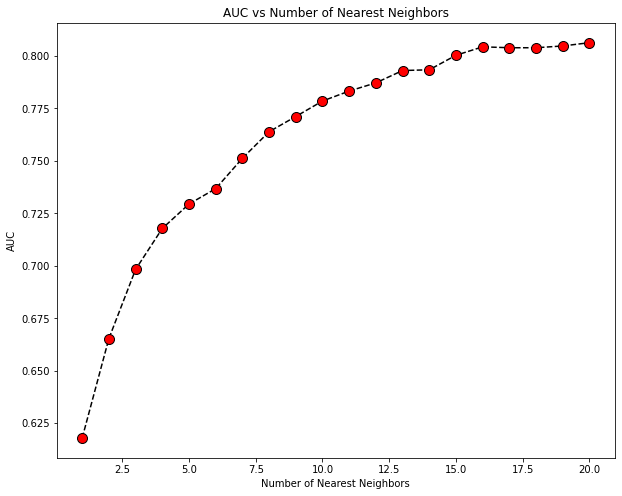

In [ ]:
plt.figure(figsize=(10, 8))
plt.plot(range(1, 21), auc_knn, linestyle = 'dashed', color = 'k', marker = 'o', markerfacecolor = 'r', markersize = 10)
plt.xlabel('Number of Nearest Neighbors')
plt.ylabel('AUC')
plt.title('AUC vs Number of Nearest Neighbors')

In [ ]:
print(max(auc_knn), auc_knn.index(max(auc_knn)))

0.8063686395831218 19


In [ ]:
auc_k =  max(auc_knn)

### Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier(n_estimators=950)
rf.fit(X_train, y_train)
pred_rf = rf.predict(X_test)
print(metrics.precision_recall_fscore_support(y_test, pred_rf))
# print(classification_report(y_test, pred_rf))
# print(confusion_matrix(y_test, pred_rf))

(array([0.94734151, 0.84946237]), array([0.99874236, 0.1133429 ]), array([0.97236313, 0.2       ]), array([11132,   697]))


In [ ]:
auc_r = []
for i in range(100, 1001, 50):
  print("Number of Estimators: ", i)
  rf1 = RandomForestClassifier(n_estimators=i)
  rf1.fit(X_train, y_train)
  pred_rf_i = rf1.predict_proba(X_test)
  auc_r.append(metrics.roc_auc_score(y_test, pred_rf_i[:,1]))


Number of Estimators:  100
Number of Estimators:  150
Number of Estimators:  200
Number of Estimators:  250
Number of Estimators:  300
Number of Estimators:  350
Number of Estimators:  400
Number of Estimators:  450
Number of Estimators:  500
Number of Estimators:  550
Number of Estimators:  600
Number of Estimators:  650
Number of Estimators:  700
Number of Estimators:  750
Number of Estimators:  800
Number of Estimators:  850
Number of Estimators:  900
Number of Estimators:  950
Number of Estimators:  1000


Text(0.5, 1.0, 'AUC vs Number of Estimators')

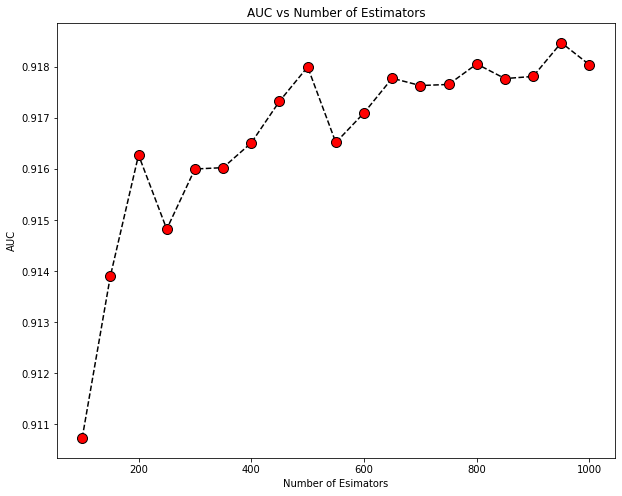

In [ ]:
plt.figure(figsize=(10, 8))
plt.plot(range(100, 1001, 50), auc_r, linestyle = 'dashed', color = 'k', marker = 'o', markerfacecolor = 'r', markersize = 10)
plt.xlabel('Number of Esimators')
plt.ylabel('AUC')
plt.title('AUC vs Number of Estimators')

In [ ]:
print(max(auc_r), auc_r.index(max(auc_r)))

0.9184783897520867 17


In [ ]:
print(len(auc_r))

19


In [ ]:
auc_rf = max(auc_r)

## Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
pred_nb = nb.predict_proba(X_test)
auc_nb = metrics.roc_auc_score(y_test, pred_nb[:,1])

In [ ]:
print(auc_nb)

0.7753276709227113


In [ ]:
pred_nb1 = nb.predict(X_test)
print(metrics.precision_recall_fscore_support(y_test, pred_nb1))

(array([0.99193382, 0.09408064]), array([0.43083004, 0.94404591]), array([0.60073902, 0.17110909]), array([11132,   697]))


## Neural Network

### Grid Search Cross Validation

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier

In [ ]:
params = {
    'hidden_layer_sizes': [(50, 25, 2), (50, 50, 2)],
    'activation': ['relu', 'logistic'],

    'alpha': [1e-5, 1e-3],

}
nn = MLPClassifier(random_state=1, max_iter=100, solver = 'adam')
cv = GridSearchCV(nn, params, cv = 3, scoring='roc_auc')
best = cv.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [ ]:
pred_nn = best.predict_proba(X_test)
auc_nn = metrics.roc_auc_score(y_test, pred_nn[:,1])

In [ ]:
nn1 = MLPClassifier(hidden_layer_sizes=(11,11,11),max_iter=500, activation='relu', alpha = 1e-5, random_state=1)
nn1.fit(X_train,y_train)
pred_nn1 =  nn1.predict(X_test)

In [ ]:
pred_nn_prob = nn1.predict_proba(X_test)
auc_nn1 = metrics.roc_auc_score(y_test, pred_nn_prob[:,1])

In [ ]:
print(auc_nn)

0.8455197342339301


In [ ]:
pred_nn2 = best.predict(X_test)
print(metrics.precision_recall_fscore_support(y_test, pred_nn2))

(array([0.95094568, 0.516     ]), array([0.98913043, 0.18507891]), array([0.96966228, 0.27243928]), array([11132,   697]))


Text(0.5, 1.0, 'Bar plot indicating the AUC for the various algorithms used')

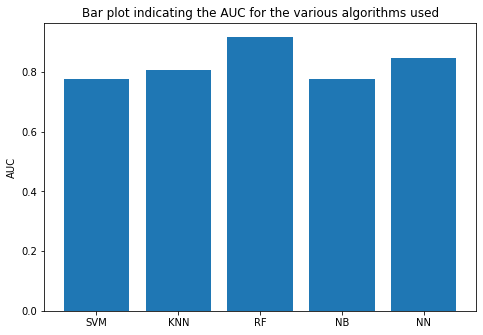

In [ ]:
Y = [auc_svm, auc_k, auc_rf, auc_nb, auc_nn]
X = ['SVM', 'KNN', 'RF', 'NB', 'NN']

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X, Y)
plt.ylabel('AUC')
plt.title('Bar plot indicating the AUC for the various algorithms used')